In [1]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
img=cv2.imread(r"C:\Users\Dell\Pictures\lenna.png")


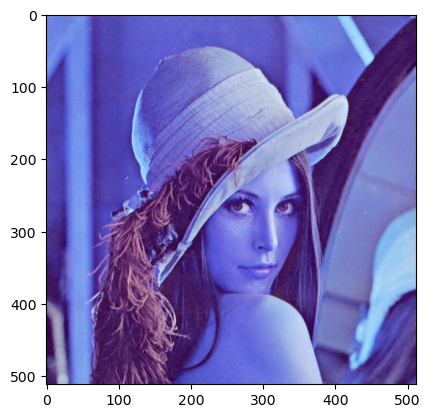

In [4]:
plt.imshow(img)
plt.show()

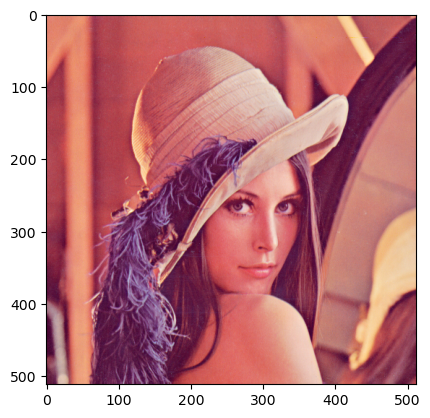

In [5]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


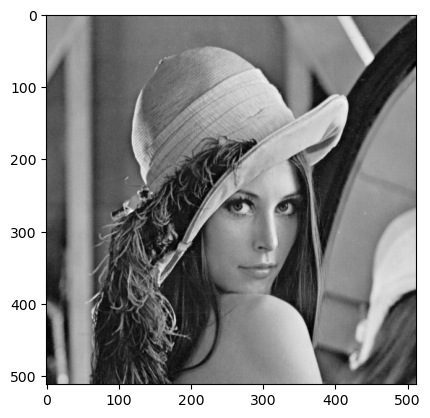

In [6]:
#grayscale 
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')

In [7]:
barbara=cv2.imread(r"C:\Users\Dell\Pictures\barbara.png",cv2.IMREAD_GRAYSCALE)

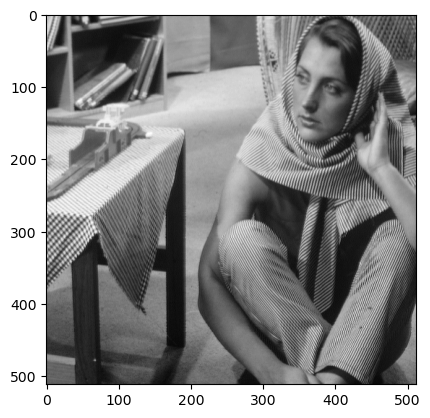

In [8]:
plt.imshow(barbara,cmap='gray')

#### Color channels

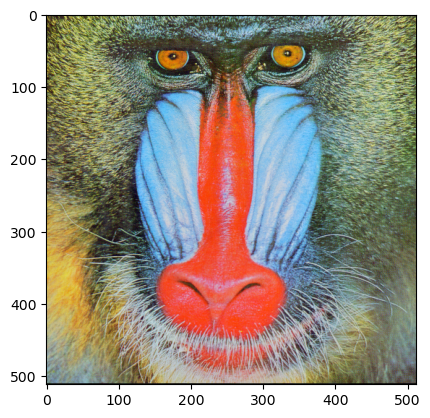

In [9]:
baboon=cv2.imread(r"C:\Users\Dell\Pictures\baboon.png")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))


In [10]:
blue,green,red=baboon[:,:,0],baboon[:,:,1],baboon[:,:,2]


In [11]:
im_bgr=cv2.vconcat([blue,green,red])

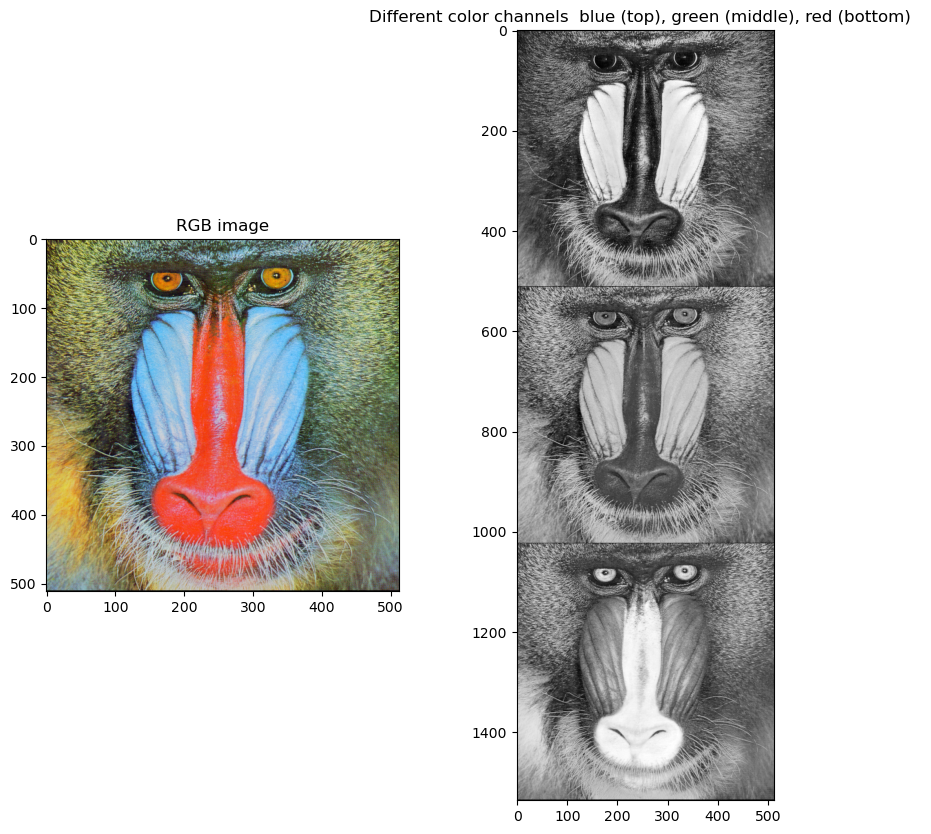

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

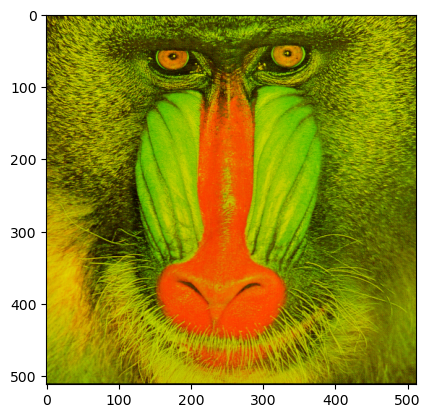

In [13]:
#question1
baboon_blue=cv2.imread(r"C:\Users\Dell\Pictures\baboon.png")
baboon_blue=cv2.cvtColor(baboon_blue,cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2]=0
plt.imshow(baboon_blue)

## Image Manipulation

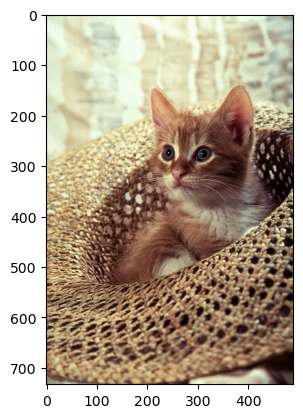

In [14]:
#flipping
cat=cv2.imread(r"C:\Users\Dell\Pictures\cat.png")
cat=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)
plt.imshow(cat)

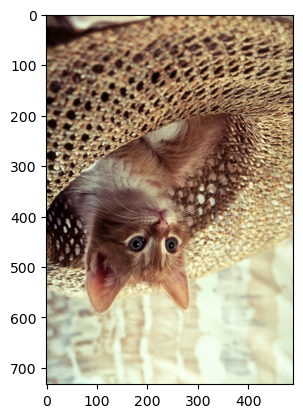

In [17]:
im_flip=cv2.flip(cat,-1)
plt.imshow(im_flip)

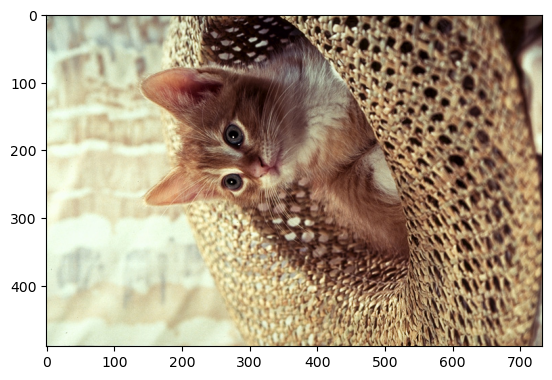

In [19]:
im_flip=cv2.rotate(cat,cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(im_flip)

# Pixel Transformation

In [20]:
#helper function
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [21]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

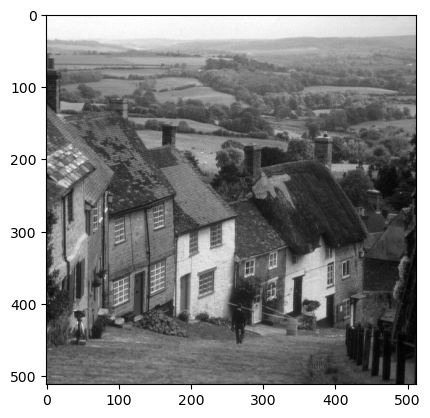

In [23]:
goldhill=cv2.imread(r"C:\Users\Dell\Pictures\goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.imshow(goldhill,cmap='gray')

In [24]:
hist=cv2.calcHist([goldhill],[0],None,[256],[0,256])

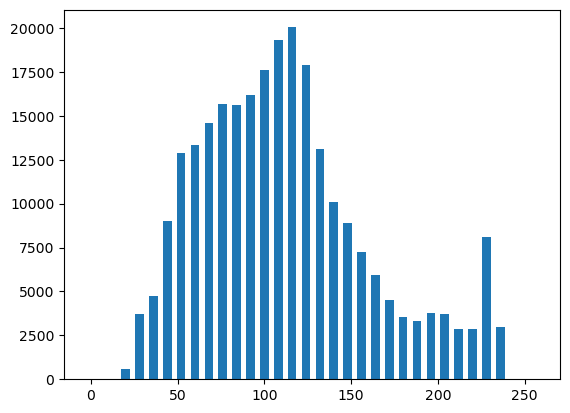

In [30]:
import numpy as np
intensity_values=np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values,hist[:,0],width=5)
plt.show()

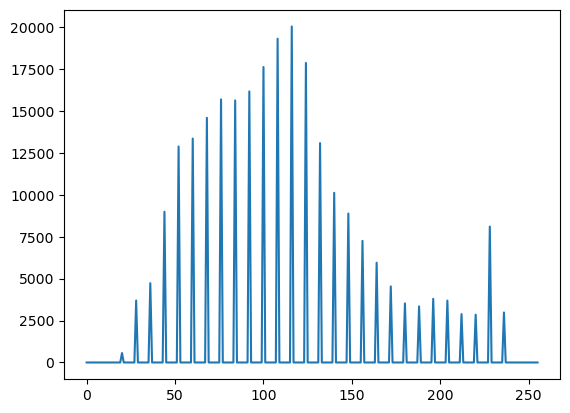

In [31]:
plt.plot(intensity_values,hist)

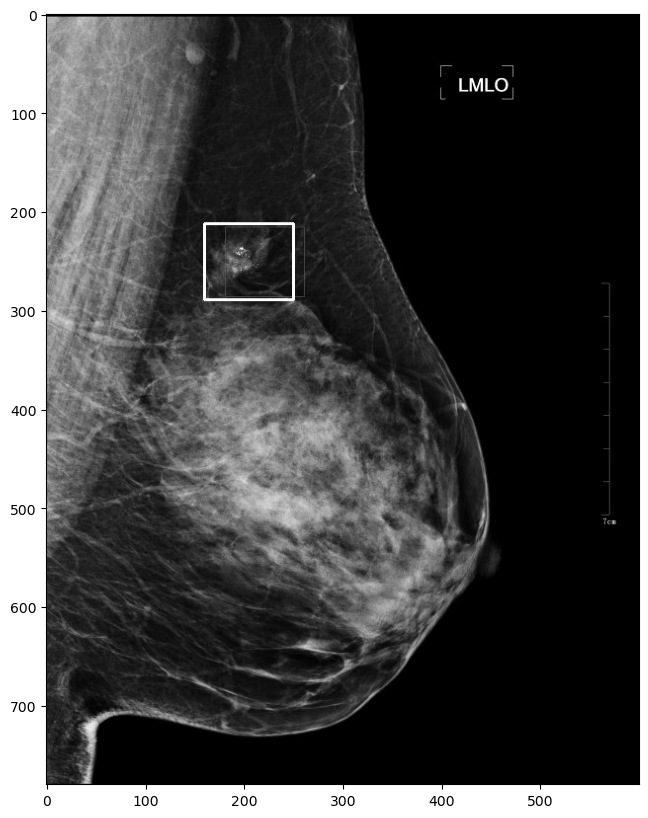

In [32]:
image = cv2.imread(r"C:\Users\Dell\Pictures\mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [33]:
img_neg = -1 * image + 255

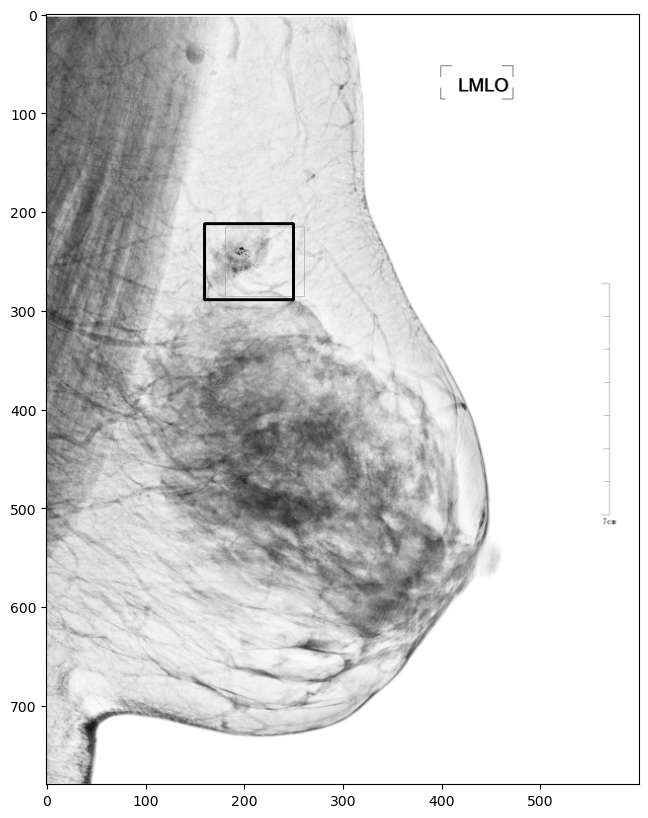

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

In [37]:
#brightness and contrast
alpha=1 #contrast
beta=100 #brightness
new_image=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

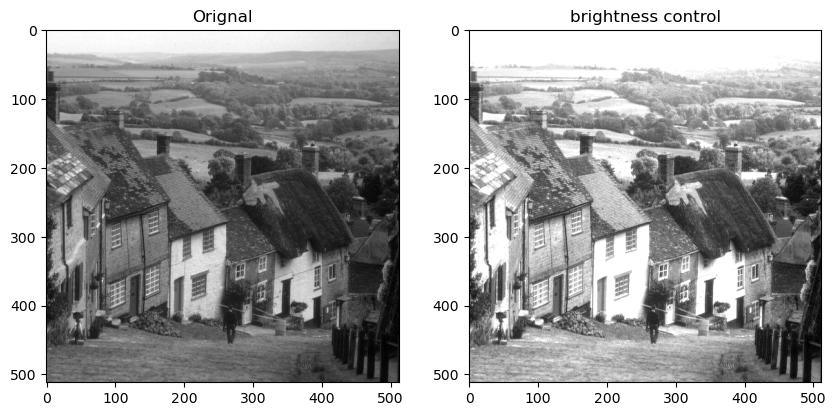

In [38]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")

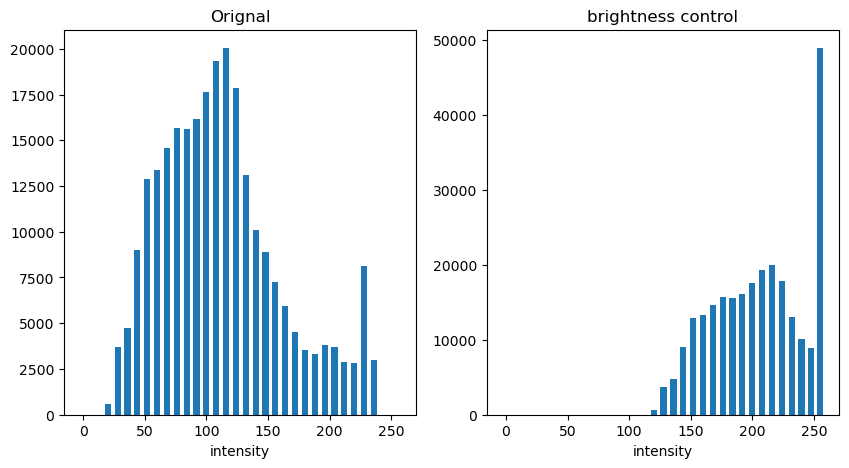

In [39]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

In [40]:
plt.figure(figsize=(10,5))
alpha = 2
beta = 0 
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

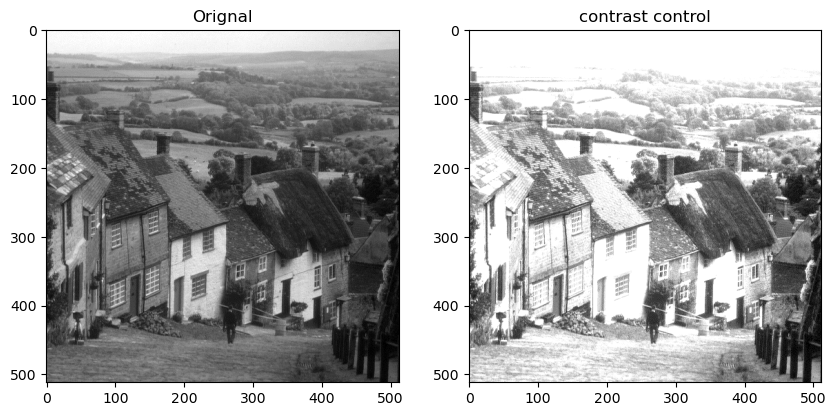

In [42]:
plot_image(goldhill,new_image,"Orignal","contrast control")

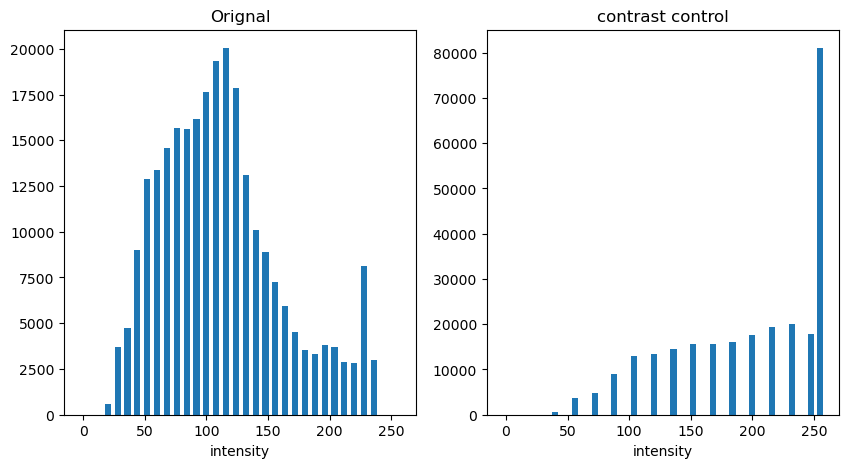

In [43]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image,"Orignal","contrast control")

In [44]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 1000x500 with 0 Axes>

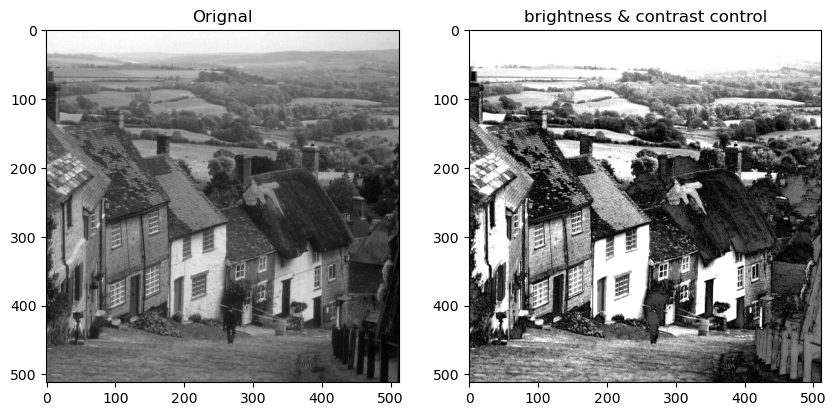

In [45]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")

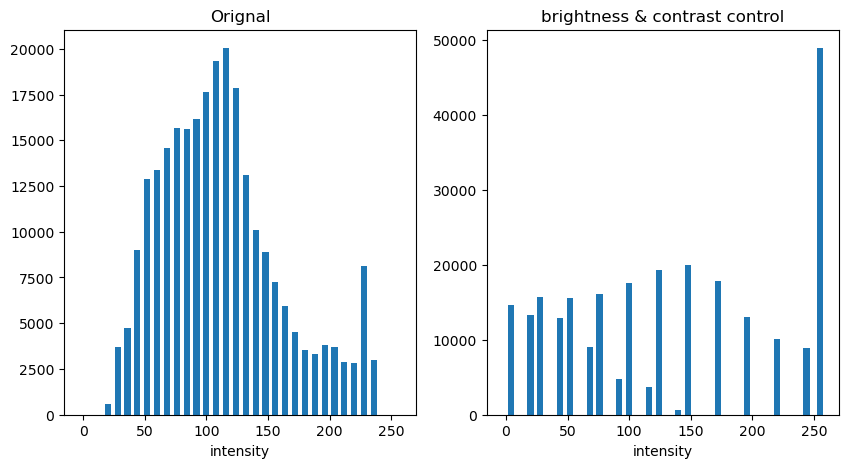

In [46]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

In [47]:
zelda=cv2.imread(r"C:\Users\Dell\Pictures\zelda.png",cv2.IMREAD_GRAYSCALE)
new_image=cv2.equalizeHist(zelda)


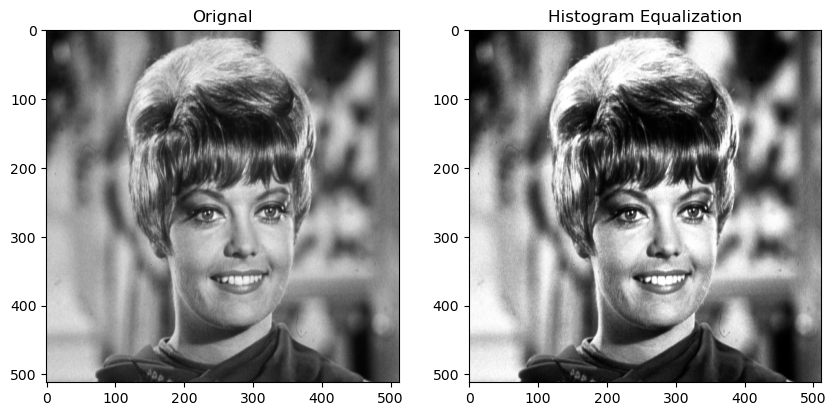

In [48]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

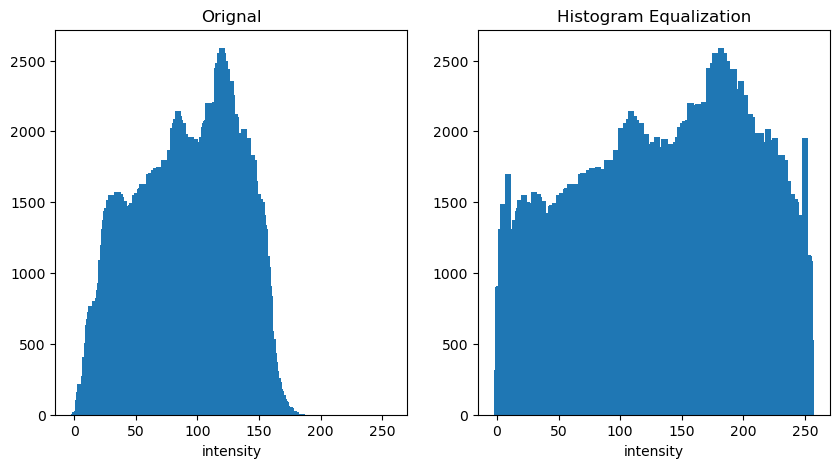

In [49]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

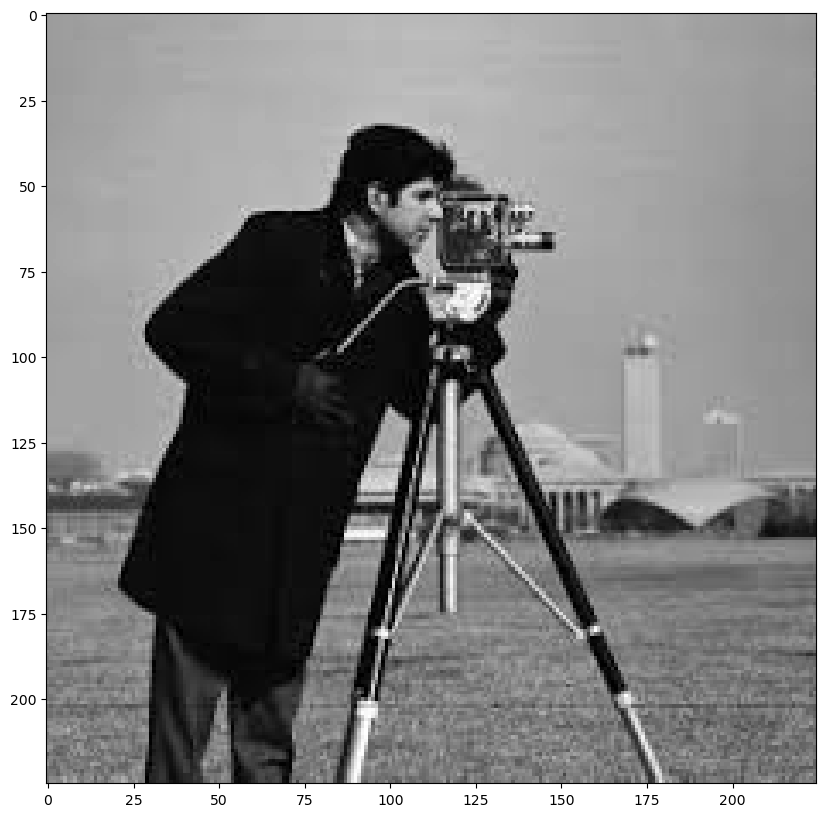

In [50]:
image = cv2.imread(r"C:\Users\Dell\Pictures\cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

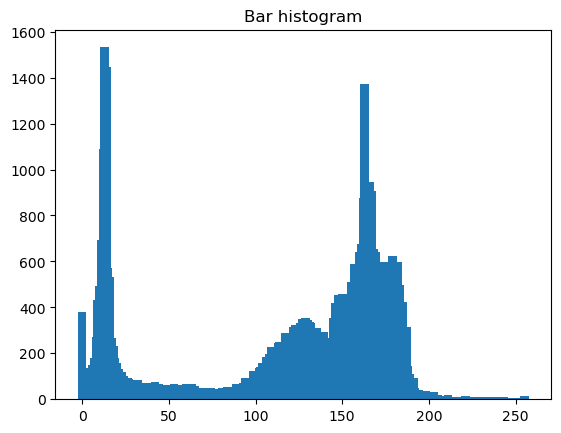

In [52]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [54]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             

In [55]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

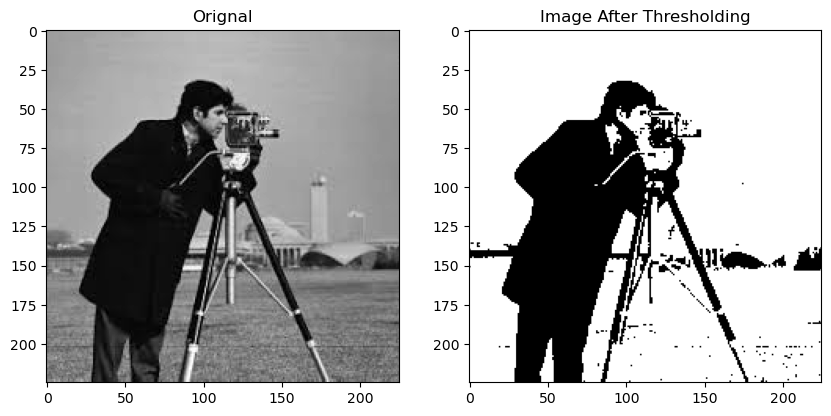

In [56]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

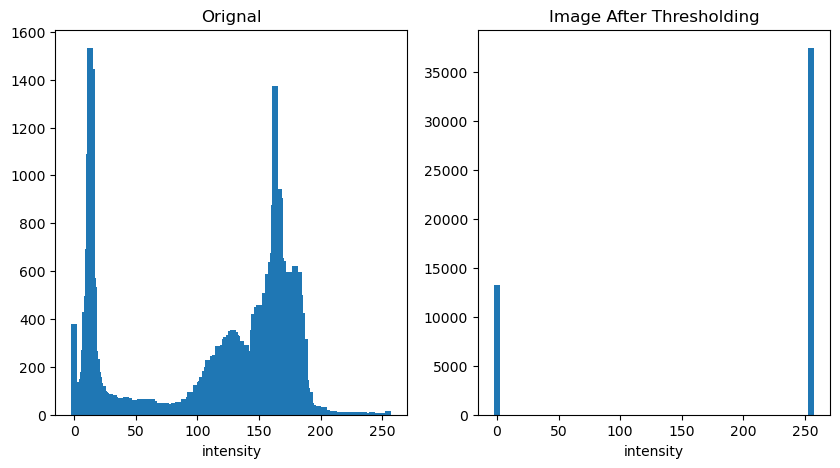

In [57]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

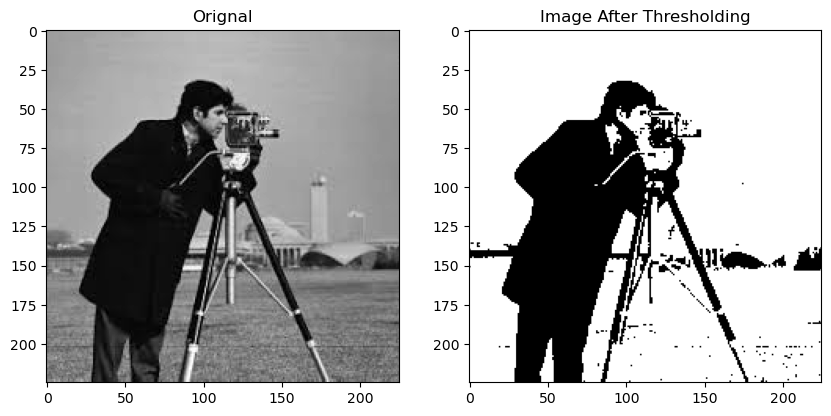

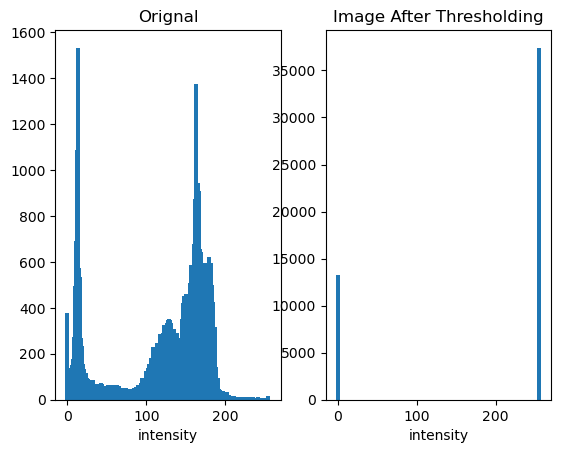

In [59]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

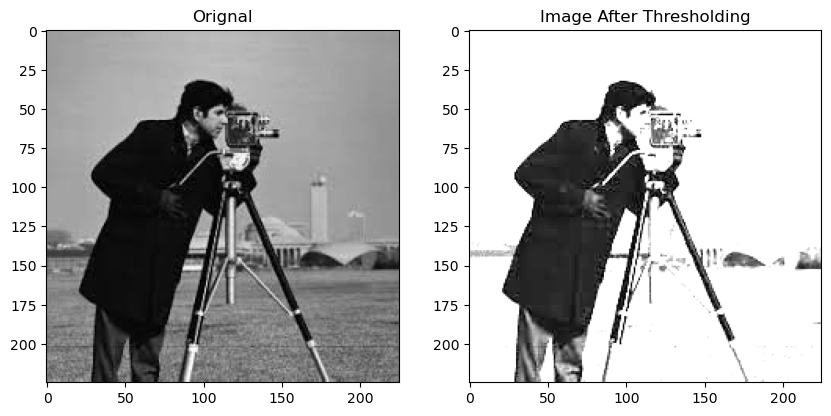

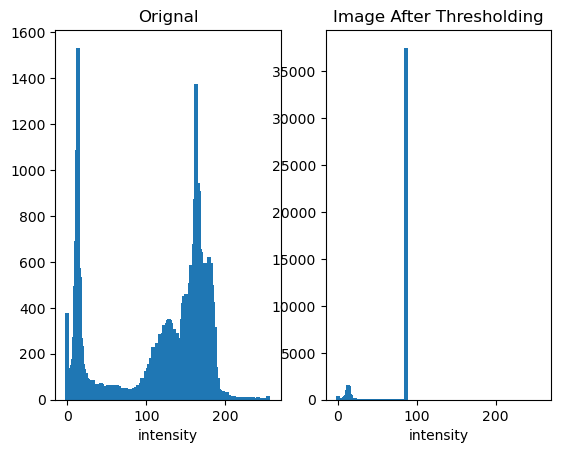

In [60]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

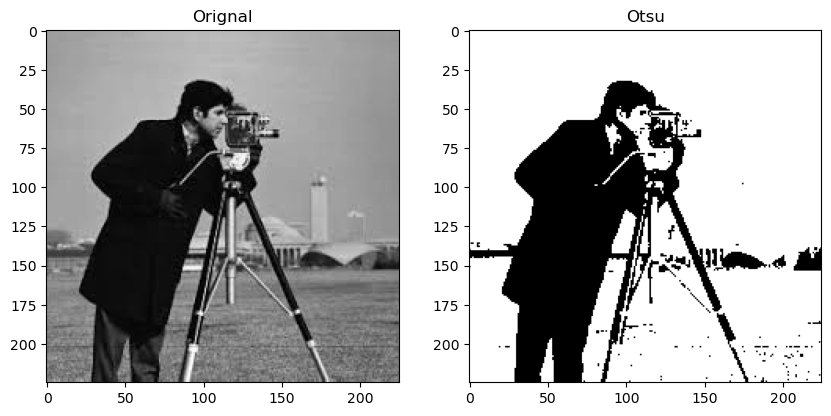

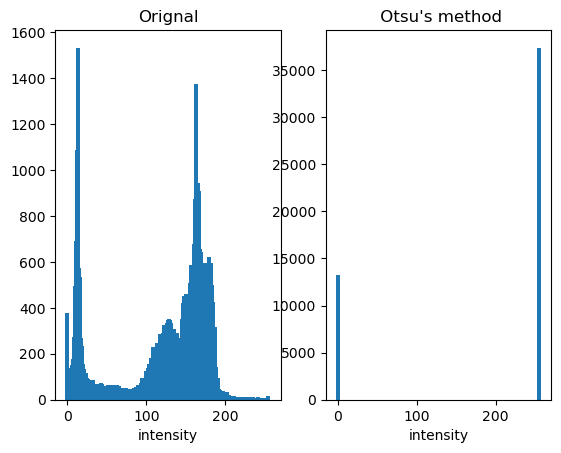

In [61]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

In [62]:
ret

88.0